In [1]:
import pandas as pd
import math
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
# Function to find the extreme points (only leftmost and rightmost) within the dataset
def findExtremePoints(ptsMatrix):
    idxMin = 0
    idxMax = 0
    minX = ptsMatrix[0, 0]
    maxX = ptsMatrix[0, 0]
    for i in range(len(ptsMatrix)):
        if (ptsMatrix[i, 0] < minX):
            idxMin = i
            minX = ptsMatrix[i, 0]
        if (ptsMatrix[i, 0] > maxX):
            idxMax = i
            maxX = ptsMatrix[i, 0]
    return idxMin, idxMax


In [3]:
# Function to check if point c is above or below the line made by point a and b
# The line direction is important:
# If the line is made from left to right, then above is the counter-clockwise direction
# If the line is made from right to left, then above is the clockwise direction
def isPointAbove(a, b, c):
    x1 = a[0]
    x2 = b[0]
    x3 = c[0]
    y1 = a[1] 
    y2 = b[1]
    y3 = c[1]

    # Calculate the cross product
    cross = (x2-x1)*(y3-y2) - (y2-y1)*(x3-x2)
    # Positive cross means the point is on the counter-clockwise direction of the line
    if (cross > 0):
        return 1
    # Negative cross means the point is on the clockwise direction of the line
    elif (cross < 0):
        return -1
    # If cross is 0, then the point is on the line
    else:
        return 0

In [4]:
# Function to find the distance from point c to a line from point a to b
def distancePointtoLine(a, b, c):
    deltaX = b[0] - a[0]
    deltaY = b[1] - a[1]
    return ((abs(deltaY * c[0] - deltaX * c[1] + b[0]*a[1] - b[1]*a[0]))/math.sqrt(deltaY**2 + deltaX**2))

In [5]:
# Function to group all elements inside the array into sets of two
def turnArraytoMatrix(hull):
    hullMatrix = []
    # Iterate through the array, skipping 1 element along the way
    for i in range (0, len(hull), 2):
        hullElmt = []
        hullElmt.append(hull[i])
        hullElmt.append(hull[i+1])

        hullMatrix.append(hullElmt)
    return hullMatrix

In [6]:
# Function to find the convex hull using divide and conquer algorithm
# Function will create a line from the starting point to the furthest point and find points outside the segment, 
# setting that point as the new furthest point
def findConvexHull(points, idx1, idx2, pos, hull):
    idxMaxDist = -1
    maxDist = 0

    # Iterate through all the points available within the dataset
    for i in range (len(points)):
        # Find the distance of each points to the center line
        distance = distancePointtoLine(points[idx1], points[idx2], points[i])

        # If the point we are currently scanning is on the correct position (either above or below based on pos), 
        # then set the index and max distance
        if ((isPointAbove(points[idx1], points[idx2], points[i]) == pos) and distance > maxDist):
            idxMaxDist = i
            maxDist = distance

    # If no more points are found (meaning all the points in that sector has been covered), append both edges of the line, 
    # then return the finished convex hull array
    if (idxMaxDist == -1):
        hull.append(idx1)
        hull.append(idx2)
        return hull
    
    # Obtain points outside of the current hull using recursion
    # Recurse points on the side of the line created by points[idxMaxDist] and p[idx1] that doesn't have the other main point (p[idx2])
    findConvexHull(points, idxMaxDist, idx1, (-1)*(isPointAbove(points[idxMaxDist], points[idx1], points[idx2])), hull)
    # Recurse points on the side of the line created by points[idxMaxDist] and p[idx2] that doesn't have the other main point (p[idx1])
    findConvexHull(points, idxMaxDist, idx2, (-1)*(isPointAbove(points[idxMaxDist], points[idx2], points[idx1])), hull)


In [7]:
# Function to find the convex hull of a given array
def myConvexHull(points):
    # Find the leftmost and rightmost points
    idxMin, idxMax = findExtremePoints(points)

    # Initialize a hull array to store convex hull's points
    hull = []

    # Call findConvexHull to recursively check points above the center line
    findConvexHull(points, idxMin, idxMax, 1, hull)

    # Call findConvexHull to recursively check points below the center line
    findConvexHull(points, idxMin, idxMax, -1, hull)

    # Group resulting array into sets of two
    hullMatrix = turnArraytoMatrix(hull)
    return hullMatrix

In [8]:
# Iris dataset

data = datasets.load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = pd.DataFrame(data.target)
print(df.shape)
df

(150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


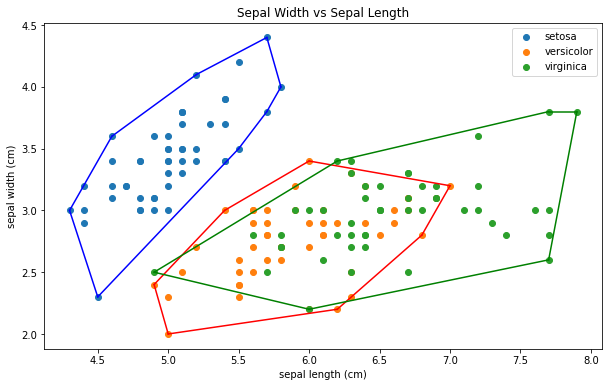

In [9]:
plt.figure(figsize=(10,6))
colors = ['b','r','g']
plt.title('Sepal Width vs Sepal Length')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
for i in range(len(data.target_names)):
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[0,1]].values
    hull = myConvexHull(bucket)
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
    for simplex in hull:
        plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])
plt.legend()

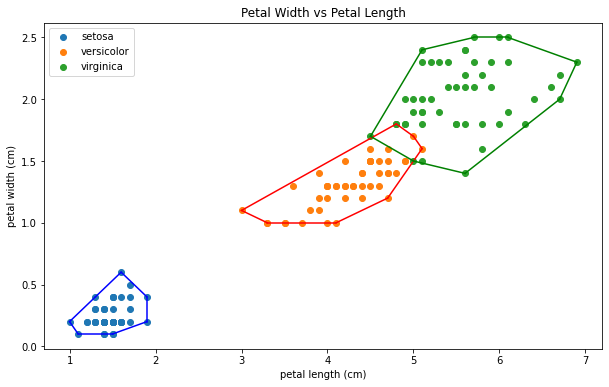

In [10]:
plt.figure(figsize=(10,6))
colors = ['b','r','g']
plt.title('Petal Width vs Petal Length')
plt.xlabel(data.feature_names[2])
plt.ylabel(data.feature_names[3])
for i in range(len(data.target_names)):
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[2,3]].values
    hull = myConvexHull(bucket)
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
    for simplex in hull:
        plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])
plt.legend()

In [11]:
# Wine dataset

data2 = datasets.load_wine()
df2 = pd.DataFrame(data2.data, columns=data2.feature_names)
df2['Target'] = pd.DataFrame(data2.target)
print(df2.shape)
df2

(178, 14)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


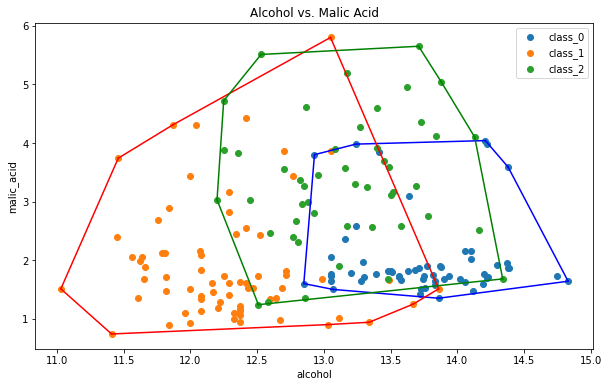

In [12]:
plt.figure(figsize=(10,6))
colors = ['b','r','g']
plt.title('Alcohol vs. Malic Acid')
plt.xlabel(data2.feature_names[0])
plt.ylabel(data2.feature_names[1])
for i in range(len(data2.target_names)):
    bucket = df2[df2['Target'] == i]
    bucket = bucket.iloc[:,[0,1]].values
    hull = myConvexHull(bucket)
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data2.target_names[i])
    for simplex in hull:
        plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])
plt.legend()

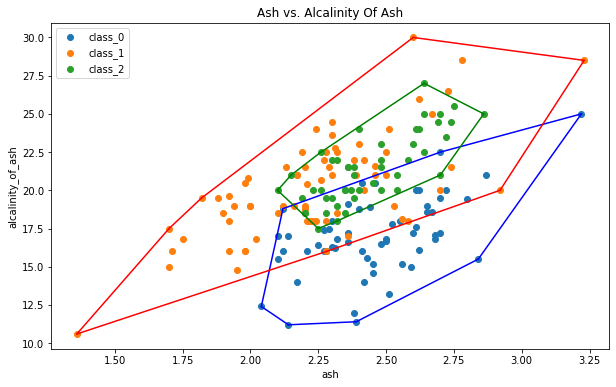

In [13]:
plt.figure(figsize=(10,6))
colors = ['b','r','g']
plt.title('Ash vs. Alcalinity Of Ash')
plt.xlabel(data2.feature_names[2])
plt.ylabel(data2.feature_names[3])
for i in range(len(data2.target_names)):
    bucket = df2[df2['Target'] == i]
    bucket = bucket.iloc[:,[2,3]].values
    hull = myConvexHull(bucket)
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data2.target_names[i])
    for simplex in hull:
        plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])
plt.legend()

In [14]:
# Breast Cancer dataset

data3 = datasets.load_breast_cancer()
df3 = pd.DataFrame(data3.data, columns=data3.feature_names)
df3['Target'] = pd.DataFrame(data3.target)
print(df3.shape)
df3

(569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


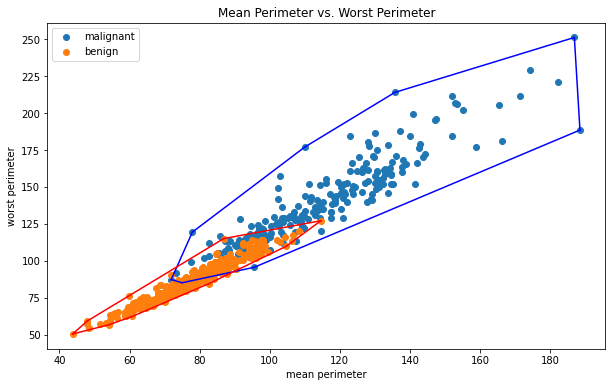

In [15]:
plt.figure(figsize=(10,6))
colors = ['b','r','g']
plt.title('Mean Perimeter vs. Worst Perimeter')
plt.xlabel(data3.feature_names[2])
plt.ylabel(data3.feature_names[22])
for i in range(len(data3.target_names)):
    bucket = df3[df3['Target'] == i]
    bucket = bucket.iloc[:,[2,22]].values
    hull = myConvexHull(bucket)
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data3.target_names[i])
    for simplex in hull:
        plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])
plt.legend()

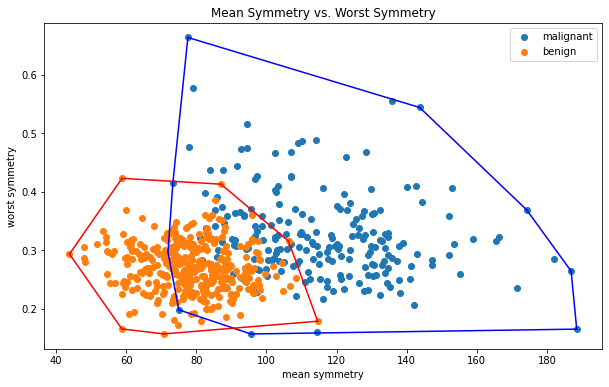

In [16]:
plt.figure(figsize=(10,6))
colors = ['b','r','g']
plt.title('Mean Symmetry vs. Worst Symmetry')
plt.xlabel(data3.feature_names[8])
plt.ylabel(data3.feature_names[28])
for i in range(len(data3.target_names)):
    bucket = df3[df3['Target'] == i]
    bucket = bucket.iloc[:,[2,28]].values
    hull = myConvexHull(bucket)
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data3.target_names[i])
    for simplex in hull:
        plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])
plt.legend()